# Obtaining data

Importing library and generating Yahoo Finance link

In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
symbol = 'GSPC'
start_date = '2016-01-01'
end_date = '2020-11-21'

In [3]:
start= datetime.datetime(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10])).timestamp()
end = datetime.datetime(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10])).timestamp()

url_string = "https://finance.yahoo.com/quote/%5E{}/history?".format(symbol)
url_string += "period1={0}&period2={1}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true".format(int(start), int(end))


Inputs to generate URL link for S&P stock form 1 Jan 2016 up to 21 Nov 2020

In [4]:
print(url_string)

https://finance.yahoo.com/quote/%5EGSPC/history?period1=1451606400&period2=1605916800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


Open up link and click download to get CSV file , file name will be ^GSPC.csv in this case for S&P500

## Preprocess data

In [5]:
filename = '^'+symbol

data = pd.read_csv(filename + '.csv')

data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.index = np.arange(1,len(data)+1)
print(len(data))
#print(type(data0))
#data = data0.set_index('Date')

1233


In [6]:
print(data.tail())
print(data.head())

           Date         Open         High          Low        Close  \
1229 2020-11-16  3600.159912  3628.510010  3600.159912  3626.909912   
1230 2020-11-17  3610.310059  3623.110107  3588.679932  3609.530029   
1231 2020-11-18  3612.090088  3619.090088  3567.330078  3567.790039   
1232 2020-11-19  3559.409912  3585.219971  3543.840088  3581.870117   
1233 2020-11-20  3579.310059  3581.229980  3556.850098  3557.540039   

        Adj Close      Volume  
1229  3626.909912  5281980000  
1230  3609.530029  4799570000  
1231  3567.790039  5274450000  
1232  3581.870117  4347200000  
1233  3557.540039  4218970000  
        Date         Open         High          Low        Close    Adj Close  \
1 2015-12-31  2060.590088  2062.540039  2043.619995  2043.939941  2043.939941   
2 2016-01-04  2038.199951  2038.199951  1989.680054  2012.660034  2012.660034   
3 2016-01-05  2013.780029  2021.939941  2004.170044  2016.709961  2016.709961   
4 2016-01-06  2011.709961  2011.709961  1979.050049  1990

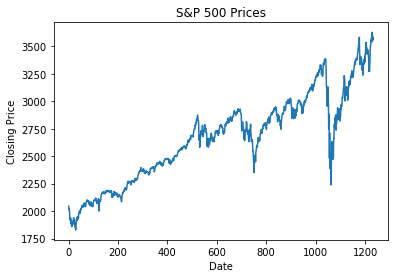

In [7]:
import matplotlib.pyplot as plt
data.Close.plot()

plt.title('S&P 500 Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.show()

# Adding additional columns

In [8]:
# Adding Simple Moving Average column for 50 days 
data['SMA']=data.Close.rolling(50,win_type = 'triang').mean()


In [9]:
# Create 5-day % changes of Last for the current day, and 5 days in the future columns
data['5d_future_close'] = data['Close'].shift(-5)
data['5d_close_future_pct'] = data['5d_future_close'].pct_change(5)
data['5d_close_pct'] = data['Close'].pct_change(5)

In [10]:
data.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1,2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2043.939941,2655330000,NaN,1922.030029,NaN,NaN
2,2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,NaN,1923.670044,NaN,NaN
3,2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,NaN,1938.680054,NaN,NaN
4,2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,NaN,1890.280029,NaN,NaN
5,2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,NaN,1921.839966,NaN,NaN
6,2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,NaN,1880.329956,-0.021696,-0.059645


In [11]:
data.tail(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1228,2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000,3404.539099,3557.540039,-0.007701,0.021573
1229,2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,3626.909912,5281980000,3408.283090,NaN,-0.019126,0.021521
1230,2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4799570000,3411.949433,NaN,-0.014404,0.018051
1231,2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,3567.790039,5274450000,3415.541313,NaN,-0.002873,-0.001363
1232,2020-11-19,3559.409912,3585.219971,3543.840088,3581.870117,3581.870117,4347200000,3419.088225,NaN,-0.006793,0.012683
1233,2020-11-20,3579.310059,3581.229980,3556.850098,3557.540039,3557.540039,4218970000,3422.543352,NaN,0.000000,-0.007701


In [12]:
clean_data = data[51:1228]
#clean_data = data[(data.index>= '2016-03-14') & (data.index < '2020-11-16')]
clean_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
52,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
53,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
54,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
55,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
56,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [13]:
clean_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
1224,2020-11-09,3583.040039,3645.989990,3547.479980,3550.500000,3550.500000,8556610000,3391.778630,3626.909912,0.021521,0.072581
1225,2020-11-10,3543.260010,3557.219971,3511.909912,3545.530029,3545.530029,6024230000,3394.362277,3609.530029,0.018051,0.052348
1226,2020-11-11,3563.219971,3581.159912,3557.000000,3572.659912,3572.659912,4609970000,3397.413389,3567.790039,-0.001363,0.037526
1227,2020-11-12,3562.669922,3569.020020,3518.580078,3537.010010,3537.010010,4890120000,3400.852196,3581.870117,0.012683,0.007566
1228,2020-11-13,3552.570068,3593.659912,3552.570068,3585.149902,3585.149902,4709670000,3404.539099,3557.540039,-0.007701,0.021573


In [14]:
# checking that no NaN values
clean_data.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
SMA                    0
5d_future_close        0
5d_close_future_pct    0
5d_close_pct           0
dtype: int64

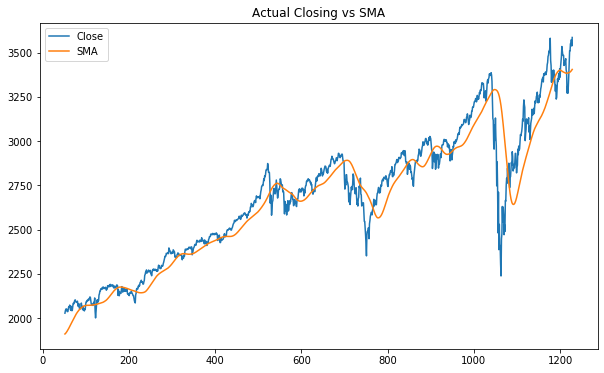

In [15]:
# Plotting graph of actual closing price vs SMA for 50 days

clean_data[['Close', 'SMA']].plot(title='Actual Closing vs SMA',figsize=(10,6))

# Splitting into train-test

In [16]:
train = clean_data[:900]
test = clean_data[900:]
train.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
52,2016-03-16,2014.239990,2032.020020,2010.040039,2027.219971,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
53,2016-03-17,2026.900024,2046.239990,2022.160034,2040.589966,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
54,2016-03-18,2041.160034,2052.360107,2041.160034,2049.580078,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
55,2016-03-21,2047.880005,2053.909912,2043.140015,2051.600098,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
56,2016-03-22,2048.639893,2056.600098,2040.569946,2049.800049,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801
57,2016-03-23,2048.550049,2048.550049,2034.859985,2036.709961,2036.709961,3639510000,1925.096623,2059.739990,0.011307,0.004681


In [17]:
x_train = train.drop(['Close','Date'], axis=1)
y_train = train['Close']
x_test = test.drop(['Close','Date'], axis=1)
y_test = test['Close']

In [18]:
x_train.head()


,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
52,2014.239990,2032.020020,2010.040039,2027.219971,4057020000,1909.725838,2036.709961,0.004681,0.019082
53,2026.900024,2046.239990,2022.160034,2040.589966,4530480000,1911.830318,2035.939941,-0.002279,0.025644
54,2041.160034,2052.360107,2041.160034,2049.580078,6503140000,1914.523006,2037.050049,-0.006113,0.013545
55,2047.880005,2053.909912,2043.140015,2051.600098,3376600000,1917.733142,2055.010010,0.001662,0.015825
56,2048.639893,2056.600098,2040.569946,2049.800049,3418460000,1921.299918,2063.949951,0.006903,0.016801


In [19]:
y_train.head()

52    2027.219971
53    2040.589966
54    2049.580078
55    2051.600098
56    2049.800049
Name: Close, dtype: float64

In [20]:
y_test.head()

952    2970.270020
953    2966.149902
954    2995.679932
955    2989.689941
956    2997.949951
Name: Close, dtype: float64

In [21]:
x_test.head()

,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
952,2963.070068,2993.280029,2963.070068,2970.270020,3580460000,2947.657703,2986.199951,0.005363,0.006186
953,2965.810059,2972.840088,2962.939941,2966.149902,2557020000,2950.179416,3006.719971,0.013678,0.009310
954,2973.610107,3003.280029,2973.610107,2995.679932,3340740000,2952.559512,2995.989990,0.000104,0.035471
955,2989.679932,2997.540039,2985.199951,2989.689941,3222570000,2954.740601,3004.520020,0.004960,0.024077
956,3000.770020,3008.290039,2991.790039,2997.949951,3115960000,2956.707601,3010.290039,0.004116,0.020360


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), 
                             columns=x_train.columns, 
                             index=x_train.index)
x_train.head()

,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
52,0.007438,0.000572,0.017954,0.026021,0.432520,0.000000,0.035277,0.588758,0.682888
53,0.019876,0.014842,0.029806,0.039061,0.508162,0.001983,0.034526,0.543265,0.725774
54,0.033887,0.020983,0.048386,0.047829,0.823322,0.004521,0.035608,0.518200,0.646692
55,0.040489,0.022538,0.050322,0.049799,0.323813,0.007546,0.053125,0.569023,0.661594
56,0.041236,0.025238,0.047808,0.048044,0.330501,0.010908,0.061844,0.603280,0.667977


In [23]:
x_test = pd.DataFrame(scaler.transform(x_test), 
                             columns=x_test.columns, 
                             index=x_test.index)
x_test.head()

,Open,High,Low,Adj Close,Volume,SMA,5d_future_close,5d_close_future_pct,5d_close_pct
952,0.939674,0.965179,0.949903,0.945783,0.356382,0.978165,0.961319,0.593214,0.598590
953,0.942366,0.944668,0.949776,0.941764,0.192874,0.980541,0.981333,0.647561,0.619012
954,0.950030,0.975214,0.960210,0.970565,0.318084,0.982784,0.970868,0.558836,0.790008
955,0.965818,0.969454,0.971544,0.964723,0.299205,0.984840,0.979187,0.590582,0.715533
956,0.976715,0.980241,0.977988,0.972779,0.282172,0.986694,0.984814,0.585064,0.691238


# Linear Regression - Benchmark model

In [24]:
# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
import numpy as np
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

3.815466097164769e-13

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, preds),np.sqrt(y_test, preds)

(1.0,
 952     54.500184
 953     54.462371
 954     54.732805
 955     54.678057
 956     54.753538
           ...    
 1224    59.586072
 1225    59.544353
 1226    59.771732
 1227    59.472767
 1228    59.876121
 Name: Close, Length: 277, dtype: float64)

In [27]:
print(preds)

[54.50018367 54.46237143 54.7328049  54.67805722 54.75353825 54.64613391
 54.8335661  54.73563729 54.81350217 54.86611011 54.97772321 55.13093435
 55.10798393 55.19755447 55.11406408 55.37968862 55.48215947 55.44925714
 55.46873019 55.54439604 55.61546618 55.56086761 55.60431717 55.62409585
 55.64737085 55.86107733 55.87512889 55.8585708  55.75356456 55.70942505
 55.76997435 55.97892365 56.04034279 56.15718906 56.04444647 55.80206194
 55.61654386 55.79211423 55.83394964 56.08841157 55.99964251 55.96892013
 56.05024427 56.29005301 56.2920958  56.49291948 56.50238951 56.49017519
 56.61598817 56.7557924  56.78036641 56.77481733 56.92020654 56.92117374
 56.75640967 56.83995099 57.07757964 56.87574261 56.97613561 56.89622072
 57.03551568 57.22499411 57.14324193 57.34221728 57.29877749 57.35233246
 57.59175339 57.70286056 57.62629642 57.63462501 57.66749552 57.40618408
 56.95287423 57.23844853 57.21363388 57.30322776 56.79366179 56.99929756
 57.42464704 57.74677429 57.84271803 57.68630653 57

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


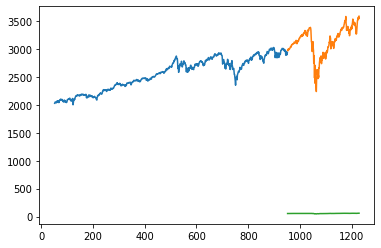

In [30]:
#plot
test['Predictions'] = 0
test['Predictions'] = preds

test.index = clean_data[900:].index
train.index = clean_data[:900].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])



In [29]:
preds[:10]

array([54.50018367, 54.46237143, 54.7328049 , 54.67805722, 54.75353825,
       54.64613391, 54.8335661 , 54.73563729, 54.81350217, 54.86611011])